In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Customer Churn.csv")

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Preprocessing

#replacing blanks with 0 as tenure is 0 and no total charges are recorded and changed the datatype to float.

In [14]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.isnull().sum().sum()

0

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df["customerID"].duplicated().sum()

0

In [24]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#converted 0 and 1 value of senior citizen to yes and no to make it easier to understand

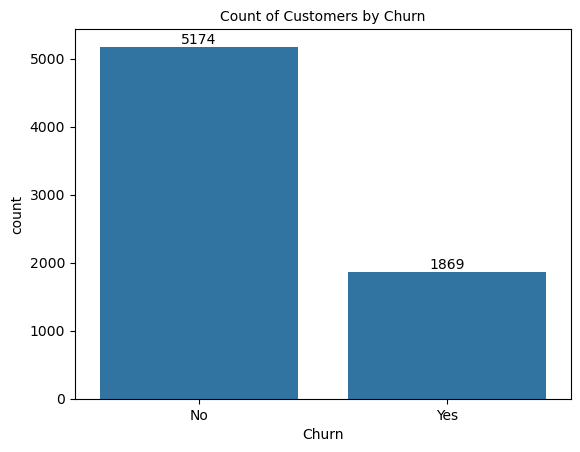

In [29]:
ax = sns.countplot(x='Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize = 10)
plt.show()

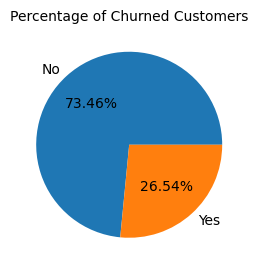

In [31]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

### From the given pie chart we can conclude that 26% of customers have churned out.
### Now let's explore the reason behind it.

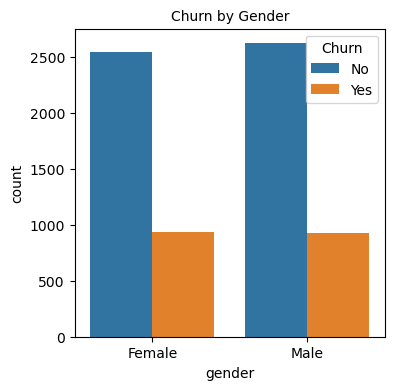

In [36]:
plt.figure(figsize = (4,4))
sns.countplot(x= df['gender'], data = df, hue = "Churn")
plt.title("Churn by Gender", fontsize = 10)
plt.show()

### From the given chart we can observe that there is not much difference between male and female who churn out.

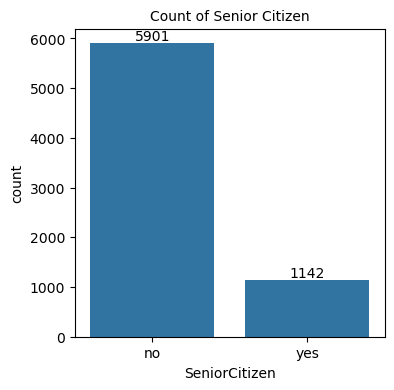

In [39]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= df['SeniorCitizen'], data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Senior Citizen", fontsize = 10)
plt.show()

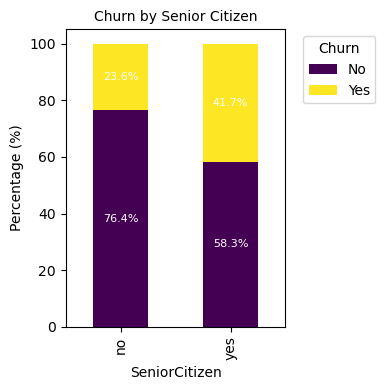

In [41]:
# Suppose df is your DataFrame.
# 1. Aggregate the counts per group.
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# 2. Pivot the data so that each SeniorCitizen group has columns for each Churn category.
pivot_df = grouped.pivot(index='SeniorCitizen', columns='Churn', values='Count').fillna(0)

# 3. Calculate percentages for each SeniorCitizen group.
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# 4. Plot a stacked bar chart.
ax = percentage_df.plot(kind='bar', stacked=True, figsize=(4, 4), colormap='viridis')

# 5. Annotate each segment with the percentage.
for idx, senior in enumerate(percentage_df.index):
    cumulative = 0
    for col in percentage_df.columns:
        value = percentage_df.loc[senior, col]
        # Only annotate if the segment is large enough to show text.
        if value > 5:
            plt.text(idx, cumulative + value/2, f'{value:.1f}%', 
                     ha='center', va='center', fontsize=8, color='white')
        cumulative += value

# 6. Customize the plot.
plt.title("Churn by Senior Citizen", fontsize=10)
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage (%)")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### We can observe that there are less number of senior citizens. Also we can observe that where there are no senior citizen the amount of churn is less as compared to senior citizen.
### Comparatively a greater percent of people in senior citizen have churned out.

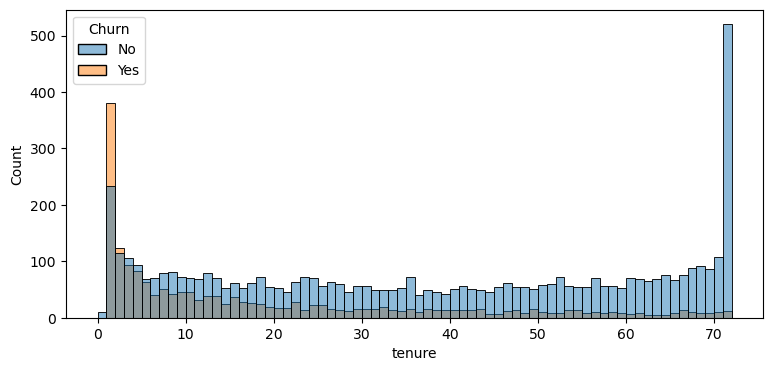

In [59]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df, bins=72, hue = "Churn")
plt.show()

### people who have used our services for long time have stayed and people who have used our services for 1 or 2 months have churned.

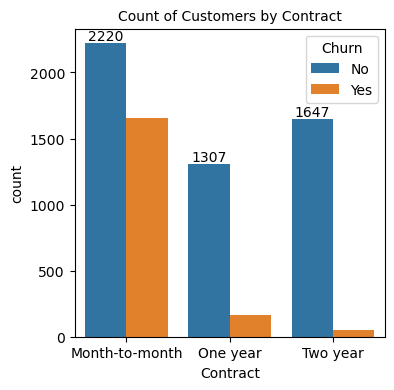

In [68]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= df['Contract'], data = df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract", fontsize = 10)
plt.show()

### people who have contract of "Month-to-month" are likely to churn than those who have 1 or 2 years of contract.

In [73]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

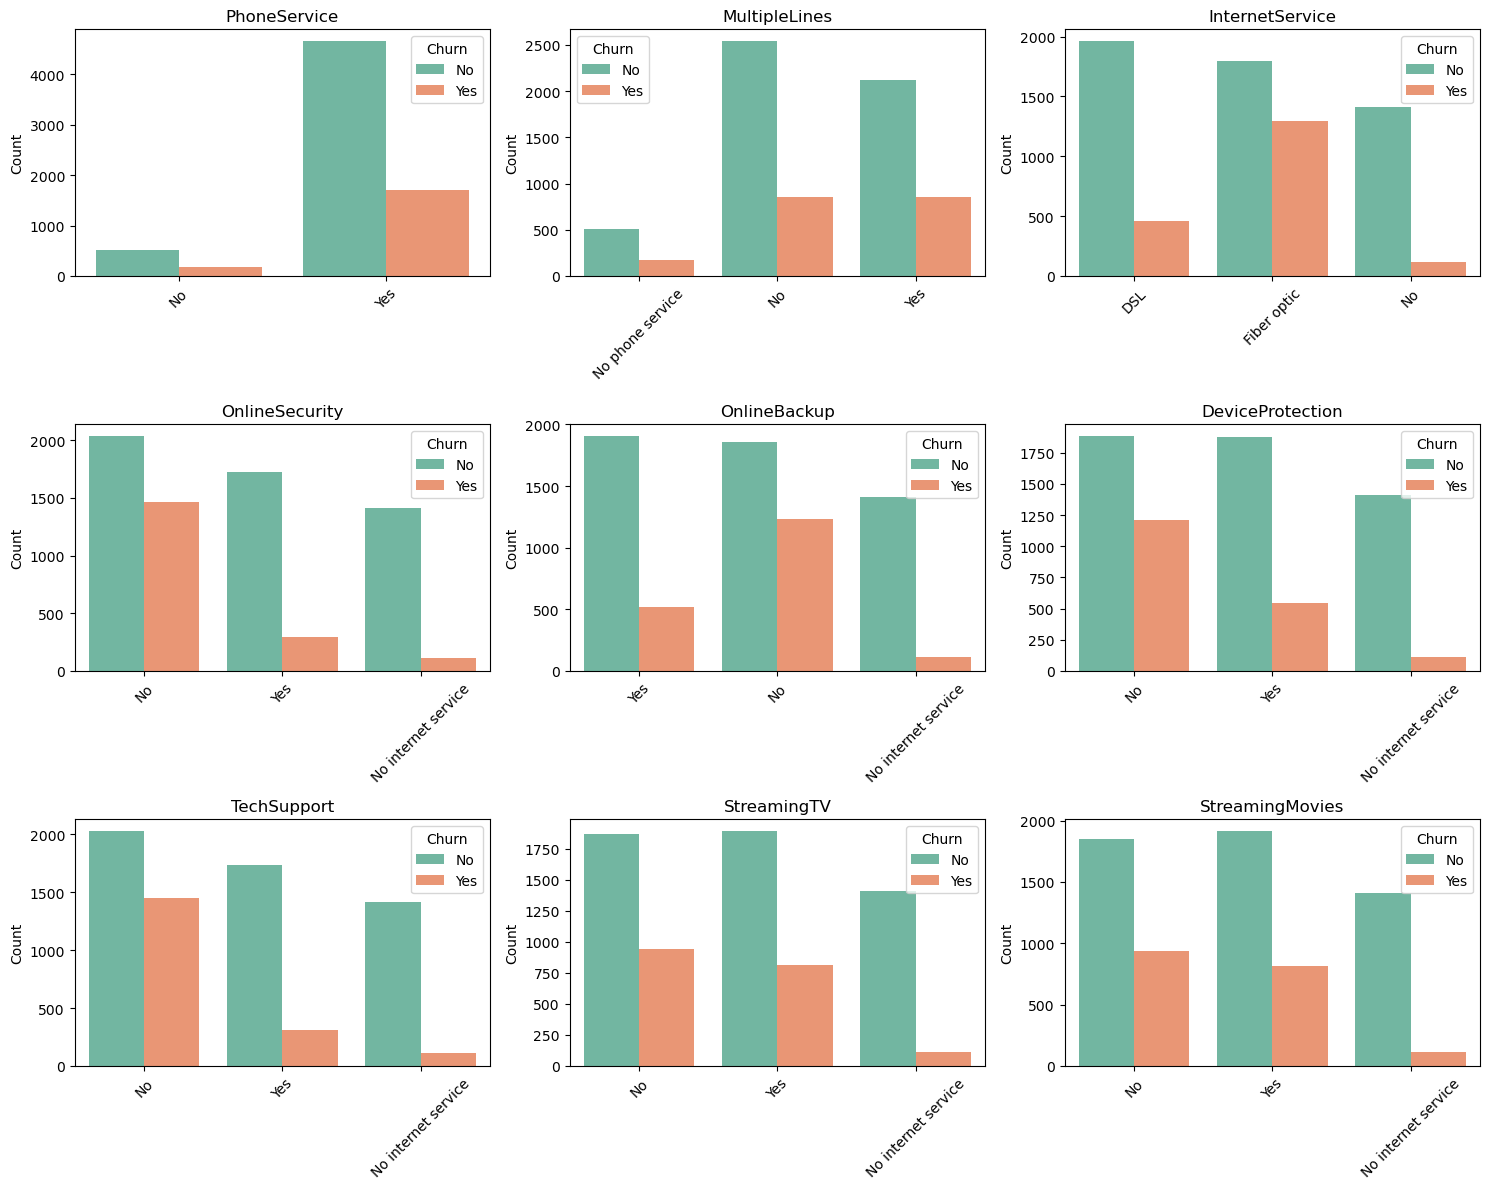

In [83]:
import pandas as pd

# Load the dataset (Replace with your actual dataset)
df = pd.read_csv("Customer Churn.csv")  # Change this to your actual dataset

# List of categorical columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns
num_cols = len(columns)

# Create subplots (adjust row and column numbers based on preference)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate count plots
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], palette="Set2", hue=df['Churn'])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


###The count plots illustrate the distribution of various telecom services among customers, segmented by churn status. Key insights include:  
###1. **Phone & Internet Services**: Most customers have phone and internet services, with fiber optic users having a higher churn rate.  
###2. **Security & Backup Features**: Customers lacking Online Security, Backup, and Tech Support show a higher likelihood of churn.  
###3. **Streaming Services**: Churn rates are relatively lower among customers subscribed to streaming services.  

###This suggests that better service engagement (security, support, and entertainment) may help reduce churn.

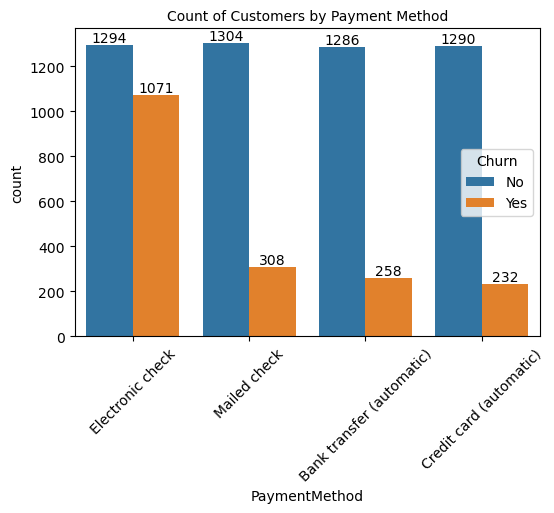

In [94]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x= df['PaymentMethod'], data = df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment Method", fontsize = 10)
plt.xticks(rotation=45)
plt.show()